In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [86]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import pathlib

import scipy.stats as ss
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
#from mlxtend.plotting import plot_learning_curves
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [4]:
df = pd.read_csv("DE.csv")

C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,weight,Finished,RecordedDate,B2,B4,E5,ISO_3,country_agg,region_agg,date_from_file,...,E4.3,E4.4,E4.5,E4.6,E4.7,E4.NA,E2.1,E2.2,E2.3,E2.NA
0,19916.865554,1,2020-12-01 00:20:04,1.0,NaN,1.0,DEU,Germany,Hessen,2020-12-01,...,0,0,1,0,0,0,1,0,0,0
1,15729.768159,1,2020-12-01 00:27:52,NaN,NaN,4.0,DEU,Germany,Sachsen,2020-12-01,...,0,0,0,0,0,0,1,0,0,0
2,16896.517040,1,2020-12-01 00:09:20,3.0,NaN,3.0,DEU,Germany,Baden-Württemberg,2020-12-01,...,0,0,0,0,0,0,1,0,0,0
3,7050.545715,1,2020-12-01 00:07:01,3.0,NaN,2.0,DEU,Germany,Nordrhein-Westfalen,2020-12-01,...,0,0,0,0,0,0,0,1,0,0
4,7830.752333,1,2020-12-01 00:09:51,2.0,2.0,1.0,DEU,Germany,Sachsen,2020-12-01,...,1,0,0,0,0,0,1,0,0,0


In [5]:
df.tail()

,weight,Finished,RecordedDate,B2,B4,E5,ISO_3,country_agg,region_agg,date_from_file,...,E4.3,E4.4,E4.5,E4.6,E4.7,E4.NA,E2.1,E2.2,E2.3,E2.NA
854189,16045.528484,1,2021-06-16 09:15:50,NaN,NaN,2.0,DEU,Germany,Thüringen,2021-06-16,...,0,0,0,0,0,0,1,0,0,0
854190,17022.189987,0,2021-06-17 01:04:09,NaN,NaN,NaN,DEU,Germany,Thüringen,2021-06-16,...,0,0,0,0,0,1,0,0,0,1
854191,16632.608913,0,2021-06-16 05:50:22,365.0,NaN,NaN,DEU,Germany,Thüringen,2021-06-16,...,0,0,0,0,0,1,0,0,0,1
854192,7717.866179,1,2021-06-16 02:01:35,NaN,NaN,4.0,DEU,Germany,Thüringen,2021-06-16,...,0,0,0,0,0,0,0,0,1,0
854193,5511.208322,0,2021-06-16 04:11:10,NaN,NaN,NaN,DEU,Germany,Thüringen,2021-06-16,...,0,0,0,0,0,1,0,0,0,1


In [6]:
df.shape

(854194, 148)

# Pre-processing dataframe

In [5]:
df = df.assign(Cli=0)
df = df.assign(Cli_who=0)

In [6]:
df.columns.values


array(['weight', 'Finished', 'RecordedDate', 'B2', 'B4', 'E5', 'ISO_3',
       'country_agg', 'region_agg', 'date_from_file', 'date', 'ISO2',
       'age', 'B1_1.1', 'B1_1.2', 'B1_1.NA', 'B1_2.1', 'B1_2.2',
       'B1_2.NA', 'B1_3.1', 'B1_3.2', 'B1_3.NA', 'B1_4.1', 'B1_4.2',
       'B1_4.NA', 'B1_5.1', 'B1_5.2', 'B1_5.NA', 'B1_6.1', 'B1_6.2',
       'B1_6.NA', 'B1_7.1', 'B1_7.2', 'B1_7.NA', 'B1_8.1', 'B1_8.2',
       'B1_8.NA', 'B1_9.1', 'B1_9.2', 'B1_9.NA', 'B1_10.1', 'B1_10.2',
       'B1_10.NA', 'B1_11.1', 'B1_11.2', 'B1_11.NA', 'B1_12.1', 'B1_12.2',
       'B1_12.NA', 'B3.1', 'B3.2', 'B3.NA', 'B5.1', 'B5.2', 'B5.NA',
       'B6.1', 'B6.2', 'B6.NA', 'B7.1', 'B7.2', 'B7.NA', 'B8.1', 'B8.2',
       'B8.3', 'B8.NA', 'C0_1.1', 'C0_1.2', 'C0_1.NA', 'C0_2.1', 'C0_2.2',
       'C0_2.NA', 'C0_3.1', 'C0_3.2', 'C0_3.NA', 'C0_4.1', 'C0_4.2',
       'C0_4.NA', 'C0_5.1', 'C0_5.2', 'C0_5.NA', 'C0_6.1', 'C0_6.2',
       'C0_6.NA', 'C1_m.1', 'C1_m.2', 'C1_m.NA', 'C2.1', 'C2.2', 'C2.3',
       'C2.4

In [7]:
lista_valor_cli_DE =[]
for i in range(len(df)):
    if (df['B1_1.1'][i] ==1 and (df['B1_2.1'][i] ==1 or df['B1_3.1'][i]==1)):
        lista_valor_cli_DE.append(1)
    else:
        lista_valor_cli_DE.append(0)


df['Cli']=lista_valor_cli_DE

In [8]:
lista_valor_cli_who_DE =[]
for i in range(len(df)):
    if (df['B1_1.1'][i] ==1 and df['B1_2.1'][i] ==1 and df['B1_4.1'][i]==1):
        lista_valor_cli_who_DE.append(1)
    else:
        lista_valor_cli_who_DE.append(0)
df['Cli_who']=lista_valor_cli_who_DE

In [9]:
df.shape

(854194, 150)

In [10]:
df1 = df.drop(df[df['B7.1']==0].index)

In [11]:
df2 = df1.drop(df1[df1['B8.NA']==1].index)

In [12]:
df3 = df2.drop(df2[df2['B8.3']==1].index)

In [13]:
# dataframe filter
df_filter = df3

In [14]:
df_filter.shape

(204843, 150)

In [15]:
# Delete NA
col_names = ['B1_1.NA','B1_2.NA','B1_3.NA','B1_4.NA','B1_5.NA','B1_6.NA','B1_7.NA','B1_8.NA','B1_9.NA','B1_10.NA','B1_11.NA','B1_12.NA','E3.NA','E4.NA','E2.NA']

for i in range(len(col_names)):
    df_filter_na = df_filter.drop(df_filter[df_filter[col_names[i]]==1].index)
    df_filter= df_filter_na

df_filter_na = df_filter

In [16]:
df_filter_na.shape

(176283, 150)

In [17]:
# dataframe without NA
df_no_na = df_filter_na

In [40]:
# dataframe with NA

df_NA = df3

In [41]:
df_no_na.columns.values

array(['weight', 'Finished', 'RecordedDate', 'B2', 'B4', 'E5', 'ISO_3',
       'country_agg', 'region_agg', 'date_from_file', 'date', 'ISO2',
       'age', 'B1_1.1', 'B1_1.2', 'B1_1.NA', 'B1_2.1', 'B1_2.2',
       'B1_2.NA', 'B1_3.1', 'B1_3.2', 'B1_3.NA', 'B1_4.1', 'B1_4.2',
       'B1_4.NA', 'B1_5.1', 'B1_5.2', 'B1_5.NA', 'B1_6.1', 'B1_6.2',
       'B1_6.NA', 'B1_7.1', 'B1_7.2', 'B1_7.NA', 'B1_8.1', 'B1_8.2',
       'B1_8.NA', 'B1_9.1', 'B1_9.2', 'B1_9.NA', 'B1_10.1', 'B1_10.2',
       'B1_10.NA', 'B1_11.1', 'B1_11.2', 'B1_11.NA', 'B1_12.1', 'B1_12.2',
       'B1_12.NA', 'B3.1', 'B3.2', 'B3.NA', 'B5.1', 'B5.2', 'B5.NA',
       'B6.1', 'B6.2', 'B6.NA', 'B7.1', 'B7.2', 'B7.NA', 'B8.1', 'B8.2',
       'B8.3', 'B8.NA', 'C0_1.1', 'C0_1.2', 'C0_1.NA', 'C0_2.1', 'C0_2.2',
       'C0_2.NA', 'C0_3.1', 'C0_3.2', 'C0_3.NA', 'C0_4.1', 'C0_4.2',
       'C0_4.NA', 'C0_5.1', 'C0_5.2', 'C0_5.NA', 'C0_6.1', 'C0_6.2',
       'C0_6.NA', 'C1_m.1', 'C1_m.2', 'C1_m.NA', 'C2.1', 'C2.2', 'C2.3',
       'C2.4

In [42]:
df_no_na.shape

(176283, 150)

In [43]:
df_NA.shape

(204843, 150)

In [44]:
df_NA.shape

(204843, 150)

###### Chi-cuadrado

In [55]:
y = df_no_na['B8.1']
x=df_no_na.drop(['weight','B8.1','B8.2','Finished','RecordedDate','B2','B4','E5','ISO_3','country_agg','region_agg','date_from_file','date','ISO2','age','B1_1.NA','B1_2.NA','B1_3.NA','B1_4.NA','B1_5.NA','B1_6.NA','B1_7.NA','B1_8.NA','B1_9.NA','B1_10.NA','B1_11.NA','B1_12.NA','B3.NA','B5.NA','B6.NA','B7.NA','B8.NA','C0_1.NA','C0_2.NA','C0_3.NA','C0_4.NA','C0_5.NA','C0_6.NA','C1_m.NA','C2.NA','C3.NA','C5.NA','C6.NA','D1.-88','D1.NA','D2.-88','D2.NA','D3.NA','D4.-88','D4.NA','E3.NA','E4.NA','E2.NA','Cli','Cli_who'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
bestfeatures_Chi2 = SelectKBest(score_func=chi2, k=9)
fit_Chi2 = bestfeatures_Chi2.fit(x_train, y_train)

Text(0.5, 1.0, 'Estadístico chi cuadrado')

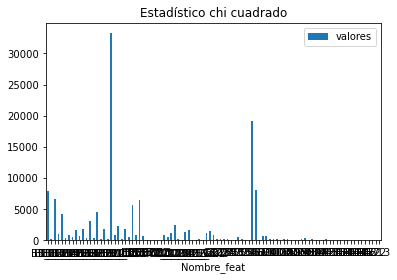

In [57]:
# gráfico de barras utilizando matplotlib
df = pd.DataFrame({'Nombre_feat':x.columns, 'valores':fit_Chi2.scores_})
ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0)
plt.title("Estadístico chi cuadrado")

Text(0.5, 1.0, 'Estadístico chi cuadrado')

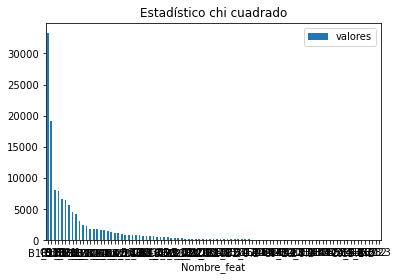

In [62]:
df_order = df.sort_values(by=['valores'],ascending= False)
ax = df_order.plot.bar(x='Nombre_feat', y='valores', rot=0)
plt.title("Estadístico chi cuadrado")

(0.0, 10.0)

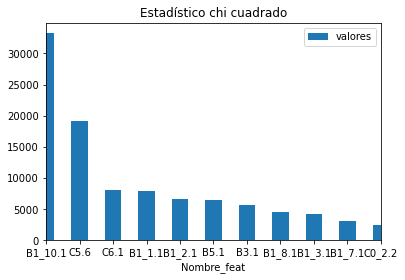

In [64]:
df_order = df.sort_values(by=['valores'],ascending= False)
ax = df_order.plot.bar(x='Nombre_feat', y='valores', rot=0)
plt.title("Estadístico chi cuadrado")
plt.xlim(0,10)

(10.0, 20.0)

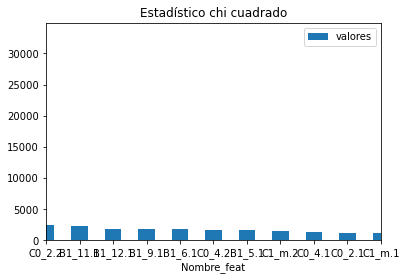

In [65]:
df_order = df.sort_values(by=['valores'],ascending= False)
ax = df_order.plot.bar(x='Nombre_feat', y='valores', rot=0)
plt.title("Estadístico chi cuadrado")
plt.xlim(10,20)

(50.0, 60.0)

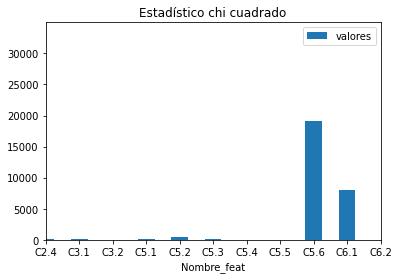

In [25]:
# gráfico de barras utilizando matplotlib
df = pd.DataFrame({'Nombre_feat':x.columns, 'valores':fit_Chi2.scores_})
ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0)
plt.title("Estadístico chi cuadrado")
plt.xlim(50,60)

###### Información mutua

In [66]:
# Selección de k características con Información Mútua
bestfeatures_MI = SelectKBest(score_func=mutual_info_classif, k=9)
fit_MI = bestfeatures_MI.fit(x_train, y_train)

Text(0.5, 1.0, 'Información Mutua')

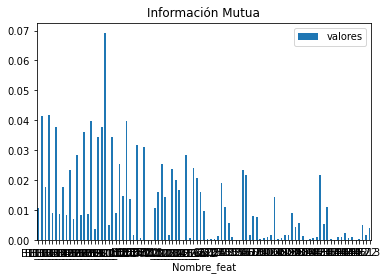

In [68]:
# gráfico de barras utilizando matplotlib
df_IM = pd.DataFrame({'Nombre_feat':x.columns, 'valores':fit_MI.scores_})
ax = df_IM.plot.bar(x='Nombre_feat', y='valores', rot=0)
plt.title("Información Mutua")

Text(0.5, 1.0, 'Estadístico chi cuadrado')

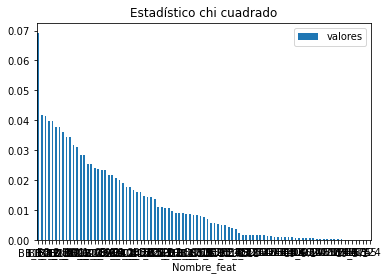

In [69]:
df_order_IM = df_IM.sort_values(by=['valores'],ascending= False)
ax = df_order_IM.plot.bar(x='Nombre_feat', y='valores', rot=0)
plt.title("Estadístico chi cuadrado")

(0.0, 10.0)

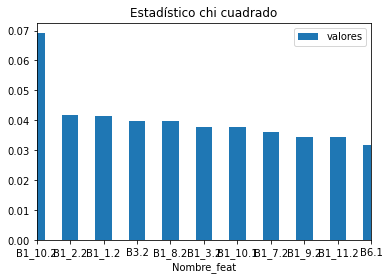

In [70]:
df_order_IM = df_IM.sort_values(by=['valores'],ascending= False)
ax = df_order_IM.plot.bar(x='Nombre_feat', y='valores', rot=0)
plt.title("Estadístico chi cuadrado")
plt.xlim(0,10)

(10.0, 20.0)

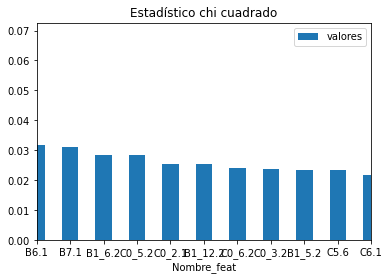

In [71]:
df_order_IM = df_IM.sort_values(by=['valores'],ascending= False)
ax = df_order_IM.plot.bar(x='Nombre_feat', y='valores', rot=0)
plt.title("Estadístico chi cuadrado")
plt.xlim(10,20)

(50.0, 60.0)

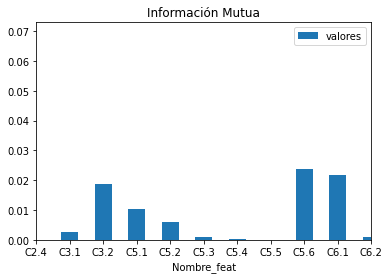

In [28]:
# gráfico de barras utilizando matplotlib
df = pd.DataFrame({'Nombre_feat':x.columns, 'valores':fit_MI.scores_})
ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0)
plt.title("Información Mutua")
plt.xlim(50,60)

# Creating our dataframe

In [19]:
#df_ok = df[['B1_1.1','B1_2.1','B1_3.1','B1_4.1','B1_5.1','B1_6.1','B1_7.1','B1_8.1','B1_9.1','B1_10.1','B1_11.1','B1_12.1','B1_13.1','B1_14.1','B8.1']]

df1_ok = df_no_na[['B1_1.1','B1_2.1','B1_3.1','B1_4.1','B1_5.1','B1_6.1','B1_7.1','B1_8.1','B1_9.1','B1_10.1','B1_11.1','B1_12.1','B8.1','E3.1','E3.2','E3.3','E3.4','E4.1','E4.2','E4.3','E4.4','E4.5','E4.6','E4.7','E2.1','E2.2','E2.3']]

df_ok_NA = df_NA[['B1_1.1','B1_1.2','B1_2.1','B1_2.2','B1_3.1','B1_3.2','B1_4.1','B1_4.2','B1_5.1','B1_5.2','B1_6.1','B1_6.2','B1_7.1','B1_7.2','B1_8.1','B1_8.2','B1_9.1','B1_9.2','B1_10.1','B1_10.2','B1_11.1','B1_11.2','B1_12.1','B1_12.2','B8.1','E3.1','E3.2','E3.3','E3.4','E4.1','E4.2','E4.3','E4.4','E4.5','E4.6','E4.7','E2.1','E2.2','E2.3']]

In [17]:
df1_ok.shape

(176283, 27)

In [18]:
df_ok_NA.shape

(204843, 39)

# Data Visualization

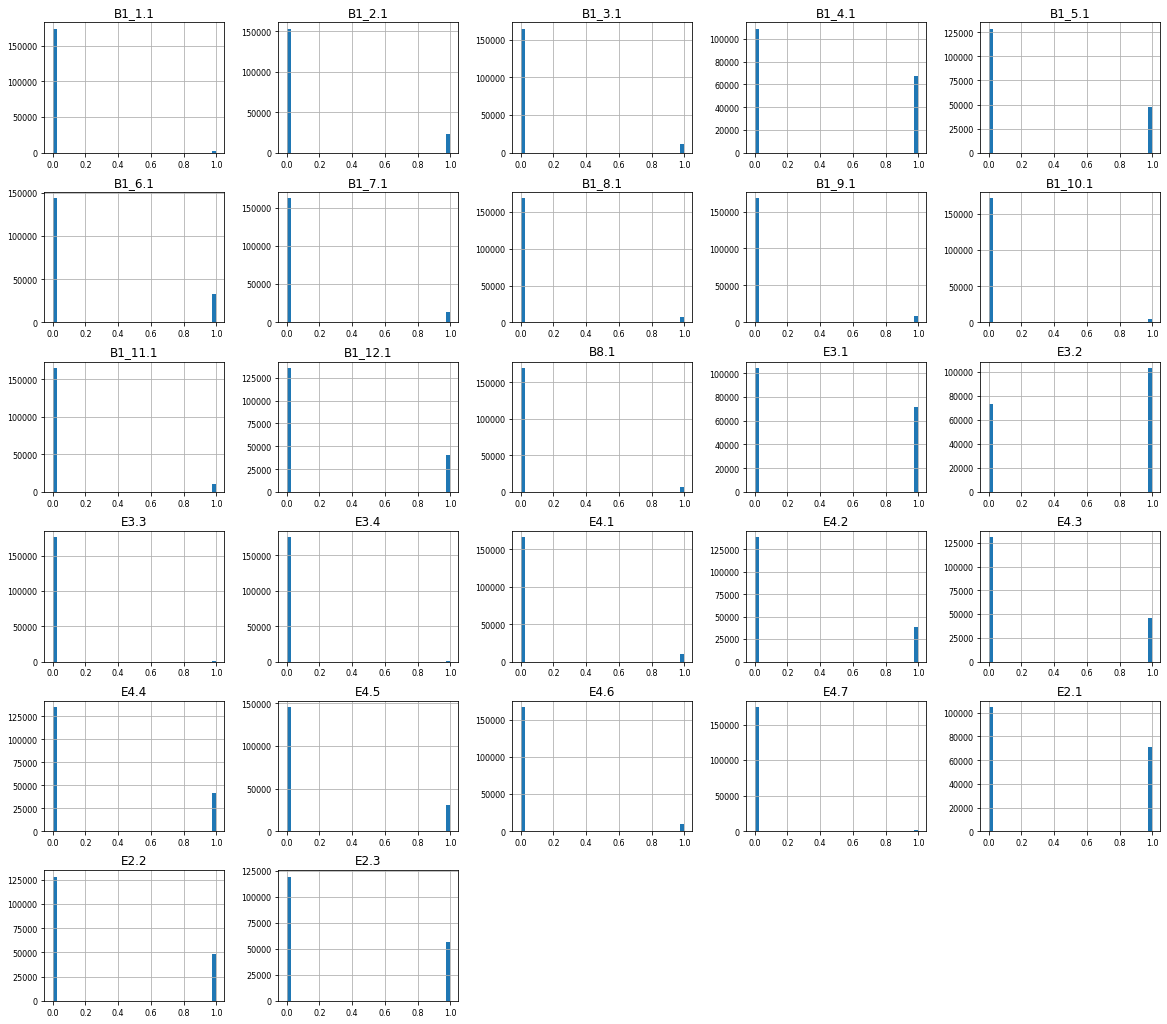

In [32]:
df1_ok.hist(figsize=(20, 18), bins=40, xlabelsize=8, ylabelsize=8, )
plt.show()

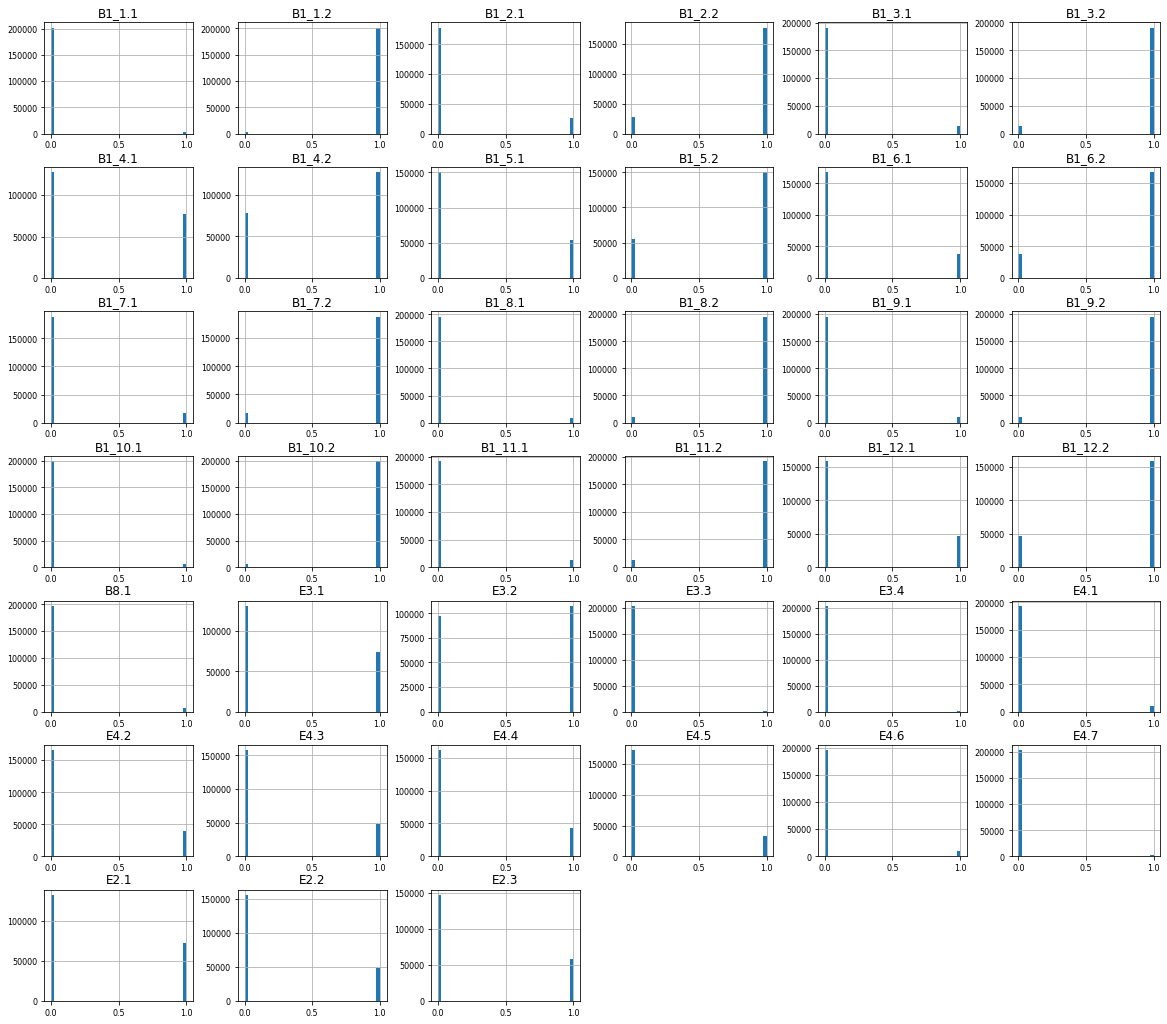

In [33]:
df_ok_NA.hist(figsize=(20, 18), bins=40, xlabelsize=8, ylabelsize=8, )
plt.show()

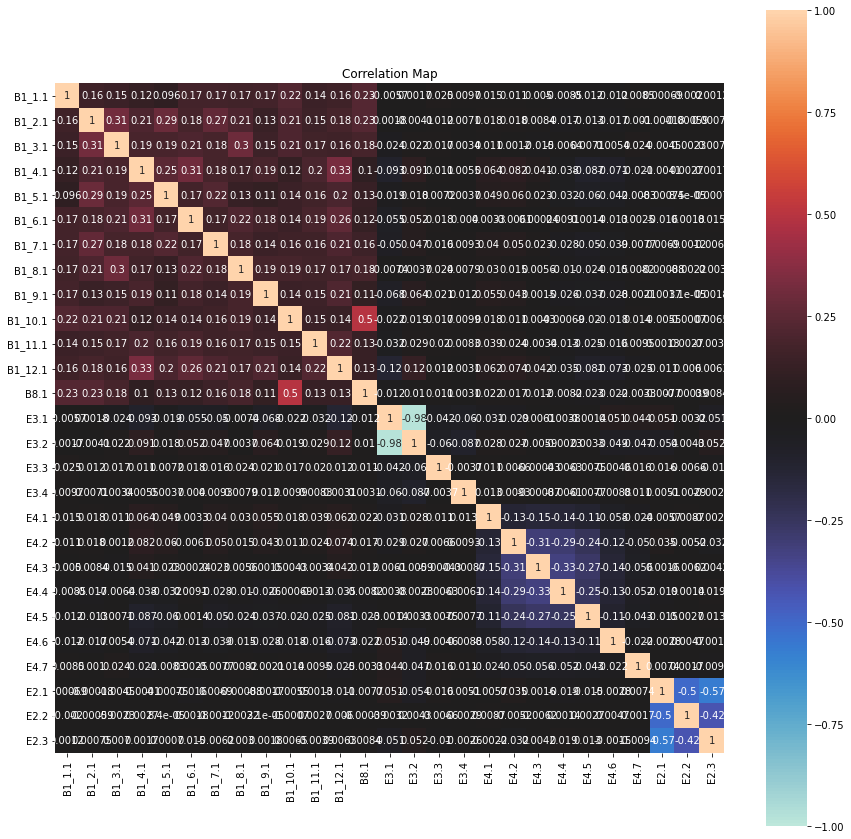

In [34]:
f, ax = plt.subplots(figsize=(15, 15))
corr = df1_ok.corr()
sns.heatmap(corr,annot=True, vmin = -1, vmax = 1, square = True, center =0, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Correlation Map')
plt.show()

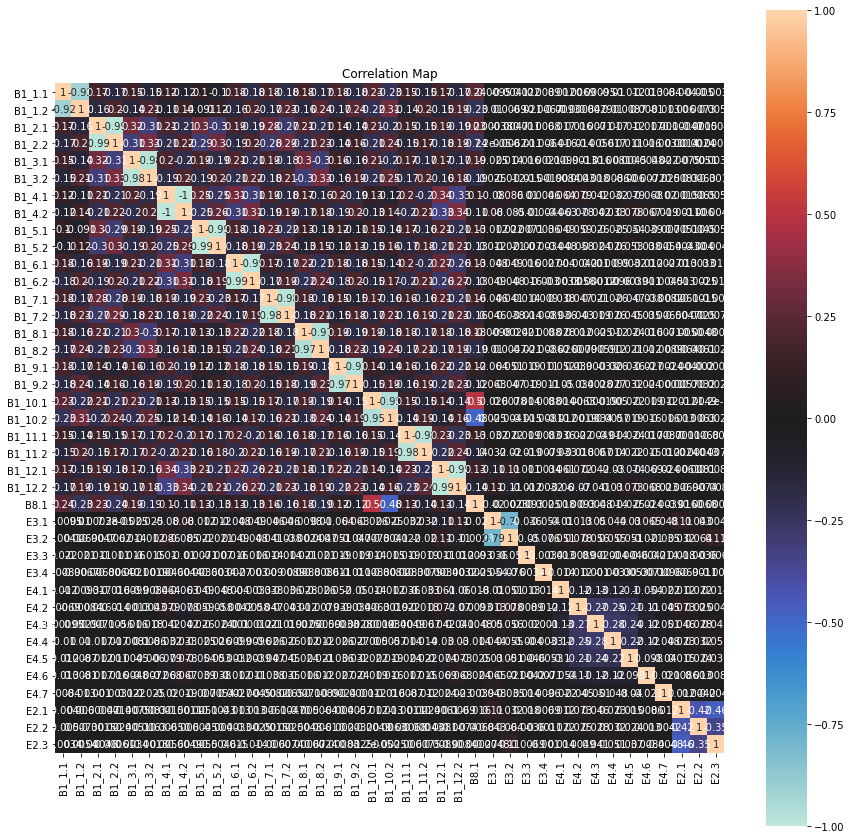

In [35]:
f, ax = plt.subplots(figsize=(15, 15))
corr = df_ok_NA.corr()
sns.heatmap(corr,annot=True, vmin = -1, vmax = 1, square = True, center =0, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Correlation Map')
plt.show()

### Output

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa621d2fcd0>]],
      dtype=object)

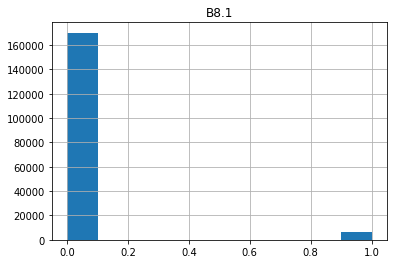

In [36]:
df1_ok.hist('B8.1')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6217b0d50>]],
      dtype=object)

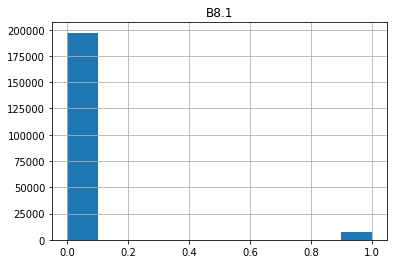

In [37]:
df_ok_NA.hist('B8.1')

# Training & Test

In [20]:
X = df1_ok.drop(['B8.1'], axis=1)
Y = df1_ok['B8.1']

X_NA = df_ok_NA.drop(['B8.1'], axis=1)
Y_NA = df_ok_NA['B8.1']

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)


X_train_NA, X_test_NA, Y_train_NA, Y_test_NA = train_test_split(X_NA, Y_NA, test_size = 0.2, random_state=2)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print()
print(X_train_NA.shape)
print(X_test_NA.shape)
print(Y_train_NA.shape)
print(Y_test_NA.shape)

(141026, 26)
(35257, 26)
(141026,)
(35257,)

(141026, 38)
(35257, 38)
(141026,)
(35257,)


In [41]:
'''
X_norm = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
print(X_train_norm.shape)
print(X_test_norm.shape)
'''

'\nX_norm = preprocessing.scale(X_train)\nscaler = preprocessing.StandardScaler().fit(X_train)\nX_train_norm = scaler.transform(X_train)\nX_test_norm = scaler.transform(X_test)\nprint(X_train_norm.shape)\nprint(X_test_norm.shape)\n'

In [25]:
!pip install shap

     |████████████████████████████████| 358kB 30.7MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491619 sha256=322ac3ef336916d673019157fec304a5be1a07a61cfcd6f8969150d0486c265f
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [24]:
import shap
# Need to load JS vis in the notebook
shap.initjs()

## Decision Tree

### df1_ok

In [44]:
max_depth = np.arange(1, 10)
min_samples_leaf = [50, 100, 200]

# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': max_depth,'min_samples_leaf': min_samples_leaf}

In [45]:
dtree_model=tree.DecisionTreeClassifier()

dtree_model = GridSearchCV(dtree_model, param_grid, cv=3)

dtree_model=dtree_model.fit(X_train, Y_train)
print(dtree_model.best_params_)


{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 50}


Accuracy: 0.9733102646283007
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     34064
           1       0.70      0.37      0.49      1193

    accuracy                           0.97     35257
   macro avg       0.84      0.68      0.74     35257
weighted avg       0.97      0.97      0.97     35257

[[33871   193]
 [  748   445]]


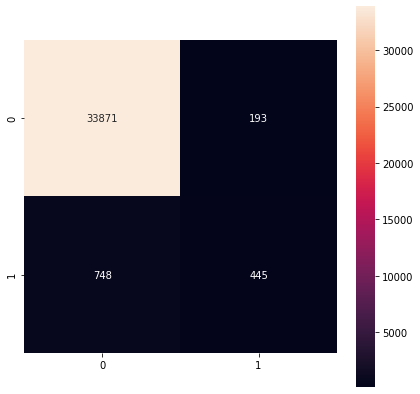

In [46]:
my_model = dtree_model.best_estimator_
my_tree=my_model.fit(X_train, Y_train)

y_predicted = my_model.predict(X_test)

print('Accuracy:',accuracy_score(Y_test, y_predicted))
print(classification_report(Y_test, y_predicted))
matrix = confusion_matrix(Y_test, y_predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test, y_predicted))


In [47]:
my_tree.get_depth()
my_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

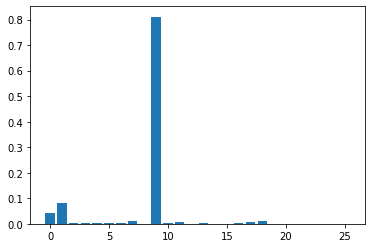

In [48]:
from matplotlib import pyplot
importance=my_tree.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [49]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

col_names= ['B1_1.1','B1_2.1','B1_3.1','B1_4.1','B1_5.1','B1_6.1','B1_7.1','B1_8.1','B1_9.1','B1_10.1','B1_11.1','B1_12.1','E3.1','E3.2','E3.3','E3.4','E4.1','E4.2','E4.3','E4.4','E4.5','E4.6','E4.7','E2.1','E2.2','E2.3']
dot_data = export_graphviz(my_tree,
                           feature_names=col_names)
graph = graph_from_dot_data(dot_data)
graph.write_png('GE_tree_df1_ok.png')

True

In [55]:
explainer = shap.TreeExplainer(my_tree)
shap_values = explainer.shap_values(X_train)

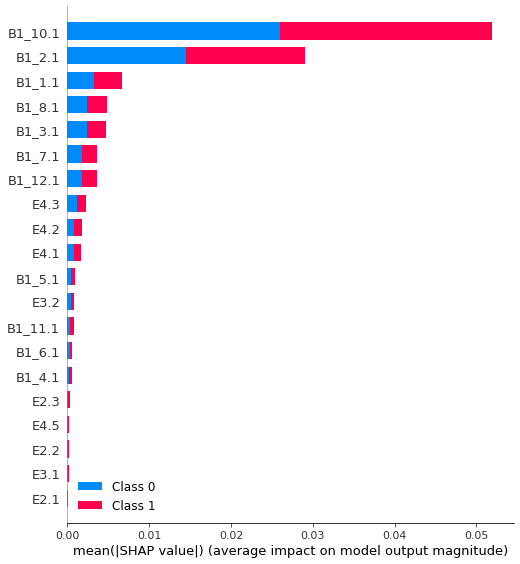

In [56]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

### df_ok_NA

In [61]:
max_depth = np.arange(1, 10)
min_samples_leaf = [50, 100, 200]

# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': max_depth,'min_samples_leaf': min_samples_leaf}

In [62]:
dtree_model_NA=tree.DecisionTreeClassifier()

dtree_model_NA = GridSearchCV(dtree_model_NA, param_grid, cv=3)

dtree_model_NA=dtree_model_NA.fit(X_train_NA, Y_train_NA)
print(dtree_model_NA.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50}


Accuracy: 0.969049769337792
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     39395
           1       0.69      0.36      0.47      1574

    accuracy                           0.97     40969
   macro avg       0.83      0.67      0.73     40969
weighted avg       0.96      0.97      0.96     40969

[[39140   255]
 [ 1013   561]]


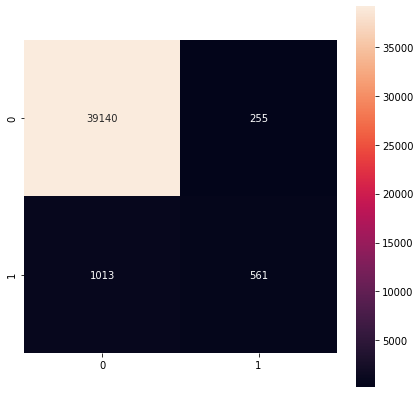

In [63]:
my_model_NA = dtree_model_NA.best_estimator_
my_tree_NA=my_model_NA.fit(X_train_NA, Y_train_NA)

y_predicted = my_model_NA.predict(X_test_NA)

print('Accuracy:',accuracy_score(Y_test_NA, y_predicted))
print(classification_report(Y_test_NA, y_predicted))
matrix = confusion_matrix(Y_test_NA, y_predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test_NA, y_predicted))

In [64]:
my_tree_NA.get_depth()
my_tree_NA.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

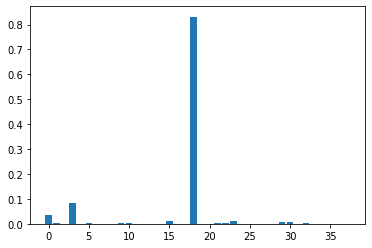

In [65]:
from matplotlib import pyplot
importance=my_tree_NA.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [68]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

col_names= ['B1_1.1','B1_1.2','B1_2.1','B1_2.2','B1_3.1','B1_3.2','B1_4.1','B1_4.2','B1_5.1','B1_5.2','B1_6.1','B1_6.2','B1_7.1','B1_7.2','B1_8.1','B1_8.2','B1_9.1','B1_9.2','B1_10.1','B1_10.2','B1_11.1','B1_11.2','B1_12.1','B1_12.2','E3.1','E3.2','E3.3','E3.4','E4.1','E4.2','E4.3','E4.4','E4.5','E4.6','E4.7','E2.1','E2.2','E2.3']
dot_data = export_graphviz(my_tree_NA,
                           feature_names=col_names)
graph = graph_from_dot_data(dot_data)
graph.write_png('GE_tree_df_ok_NA.png')

True

In [70]:
explainer = shap.TreeExplainer(my_tree_NA)
shap_values = explainer.shap_values(X_train_NA)

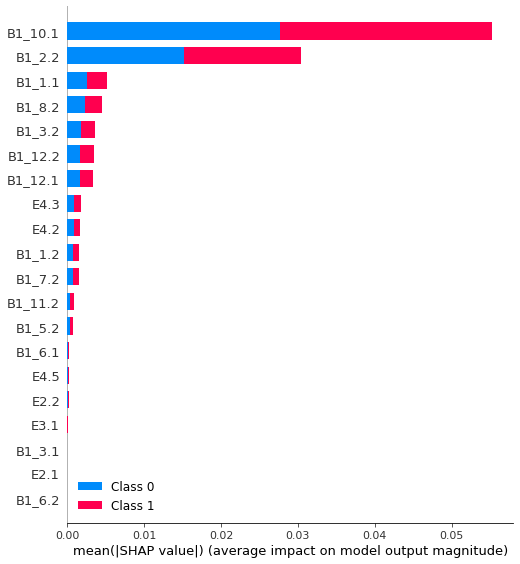

In [71]:
shap.summary_plot(shap_values, features=X_train_NA, feature_names=X_train_NA.columns)

## Random Forest

### df1_ok

In [27]:
rfc=RandomForestClassifier(random_state=42)

In [28]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [29]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [30]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [31]:
my_model = CV_rfc.best_estimator_
RF =my_model.fit(X_train, Y_train)


In [32]:
y_pred = RF.predict(X_test)

Accuracy: 0.9731684488186743
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     34064
           1       0.74      0.32      0.44      1193

    accuracy                           0.97     35257
   macro avg       0.86      0.66      0.71     35257
weighted avg       0.97      0.97      0.97     35257

[[33935   129]
 [  817   376]]


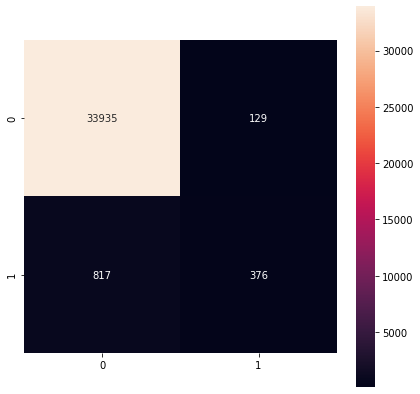

In [33]:
print('Accuracy:',accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
matrix = confusion_matrix(Y_test, y_pred)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test, y_pred))

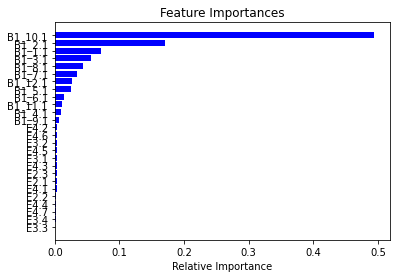

In [34]:
importances = RF.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [35]:
explainer = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(X_train)

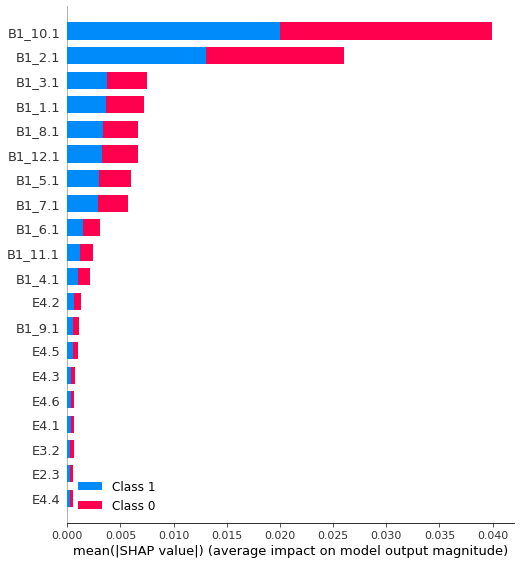

In [36]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

#### https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a

### df_ok_NA

In [32]:
rfc_NA=RandomForestClassifier(random_state=42)

In [33]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [34]:
CV_rfc_NA = GridSearchCV(estimator=rfc_NA, param_grid=param_grid, cv= 3)
CV_rfc_NA.fit(X_train_NA, Y_train_NA)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [35]:
CV_rfc_NA.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [36]:
my_model_NA = CV_rfc_NA.best_estimator_
RF_NA =my_model_NA.fit(X_train_NA, Y_train_NA)

In [37]:
y_pred_NA = RF_NA.predict(X_test_NA)

Accuracy: 0.9689277258414899
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     39395
           1       0.70      0.33      0.45      1574

    accuracy                           0.97     40969
   macro avg       0.84      0.66      0.72     40969
weighted avg       0.96      0.97      0.96     40969

[[39169   226]
 [ 1047   527]]


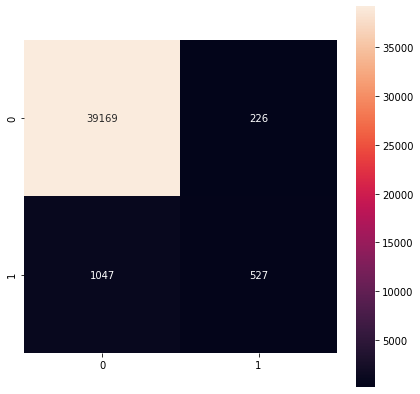

In [38]:
print('Accuracy:',accuracy_score(Y_test_NA, y_pred_NA))
print(classification_report(Y_test_NA, y_pred_NA))
matrix = confusion_matrix(Y_test_NA, y_pred_NA)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test_NA, y_pred_NA))

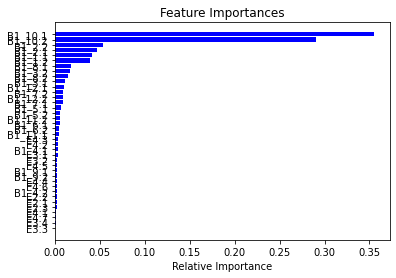

In [39]:
importances = RF_NA.feature_importances_
indices = np.argsort(importances)
features = X_train_NA.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [40]:
explainer = shap.TreeExplainer(RF_NA)
shap_values = explainer.shap_values(X_train_NA)

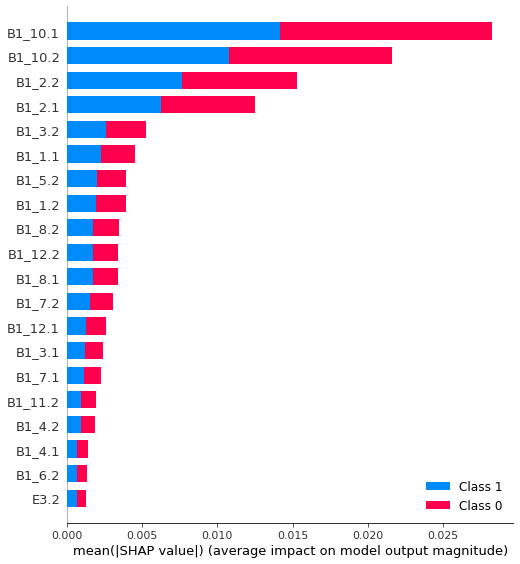

In [41]:
shap.summary_plot(shap_values, features=X_train_NA, feature_names=X_train_NA.columns)

## Neural Network

### df1_ok

In [27]:
neg, pos = np.bincount(df1_ok['B8.1'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 176283
    Positive: 6197 (3.52% of total)



In [28]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.52
Weight for class 1: 14.22


In [29]:
def baseline_model():
    model = Sequential()
    model.add(Dense(2000, input_dim=X_train.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu')),
    model.add(Dropout(0.5)),
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
    return model

In [30]:
model = baseline_model()

history = model.fit(
  X_train, Y_train, batch_size = 512,
  epochs=50, validation_split = 0.1,
  class_weight=class_weight)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/50
248/248 [==============================] - 27s 16ms/step - loss: 0.7474 - binary_accuracy: 0.6694 - val_loss: 0.6670 - val_binary_accuracy: 0.9524
Epoch 2/50
248/248 [==============================] - 3s 13ms/step - loss: 0.5320 - binary_accuracy: 0.8389 - val_loss: 0.5836 - val_binary_accuracy: 0.9173
Epoch 3/50
248/248 [==============================] - 3s 13ms/step - loss: 0.5036 - binary_accuracy: 0.8860 - val_loss: 0.5206 - val_binary_accuracy: 0.9285
Epoch 4/50
248/248 [==============================] - 3s 13ms/step - loss: 0.4916 - binary_accuracy: 0.8935 - val_loss: 0.5560 - val_binary_accuracy: 0.9073
Epoch 5/50
248/248 [==============================] - 3s 12ms/step - loss: 0.4865 - binary_accuracy: 0.8836 - val_loss: 0.4879 - val_binary_accuracy: 0.9073
Epoch 6/50
248/248 [==============================] - 3s 13ms/step - loss: 0

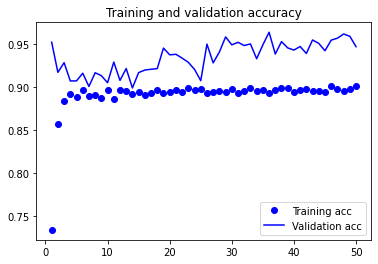

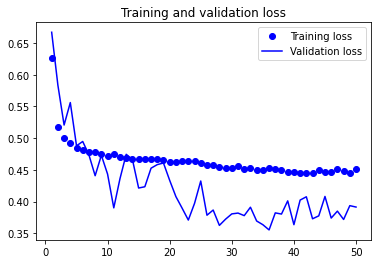

In [31]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

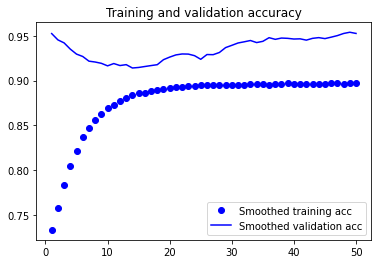

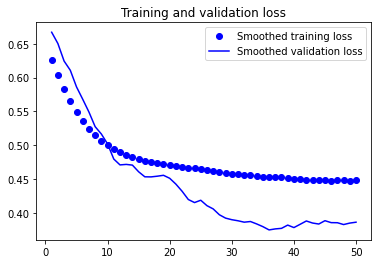

In [32]:
def smooth_curve(points, factor=0.8): 
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else: 
            smoothed_points.append(point)
    return smoothed_points
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [33]:
model.evaluate(X_test, Y_test)

1102/1102 [==============================] - 3s 3ms/step - loss: 0.3932 - binary_accuracy: 0.9485


[0.393160343170166, 0.948520839214325]

Total accuracy: 94.85208611055961 %
[[32752  1312]
 [  503   690]]


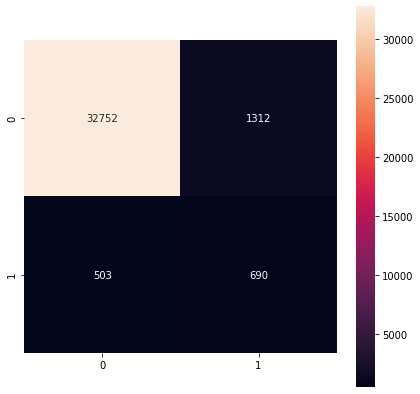

In [34]:
predicted = np.array([int(x[0] > 0.5) for x in model.predict(X_test)])
print("Total accuracy:", np.sum(predicted==Y_test) / len(predicted) * 100., "%") 
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### df_ok_NA

In [40]:
neg, pos = np.bincount(df_ok_NA['B8.1'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 204843
    Positive: 7740 (3.78% of total)



In [41]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.52
Weight for class 1: 13.23


In [42]:
def baseline_model_NA():
    model = Sequential()
    model.add(Dense(2000, input_dim=X_train_NA.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu')),
    model.add(Dropout(0.5)),
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
    return model

In [43]:
model_NA = baseline_model_NA()

history = model_NA.fit(
  X_train_NA, Y_train_NA, batch_size = 512,
  epochs=50, validation_split = 0.1,
  class_weight=class_weight)

Epoch 1/50
289/289 [==============================] - 7s 15ms/step - loss: 0.7666 - binary_accuracy: 0.6708 - val_loss: 0.6136 - val_binary_accuracy: 0.9624
Epoch 2/50
289/289 [==============================] - 4s 13ms/step - loss: 0.5220 - binary_accuracy: 0.8469 - val_loss: 0.5255 - val_binary_accuracy: 0.9246
Epoch 3/50
289/289 [==============================] - 4s 13ms/step - loss: 0.4952 - binary_accuracy: 0.8723 - val_loss: 0.4968 - val_binary_accuracy: 0.9276
Epoch 4/50
289/289 [==============================] - 4s 13ms/step - loss: 0.4960 - binary_accuracy: 0.8872 - val_loss: 0.5232 - val_binary_accuracy: 0.9095
Epoch 5/50
289/289 [==============================] - 4s 13ms/step - loss: 0.4874 - binary_accuracy: 0.8859 - val_loss: 0.5003 - val_binary_accuracy: 0.9254
Epoch 6/50
289/289 [==============================] - 4s 13ms/step - loss: 0.4842 - binary_accuracy: 0.8822 - val_loss: 0.5034 - val_binary_accuracy: 0.9137
Epoch 7/50
289/289 [==============================] - 4s 1

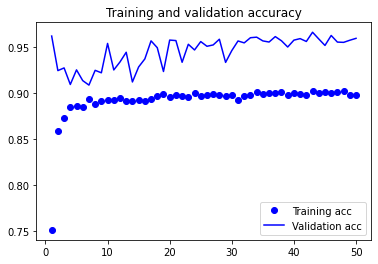

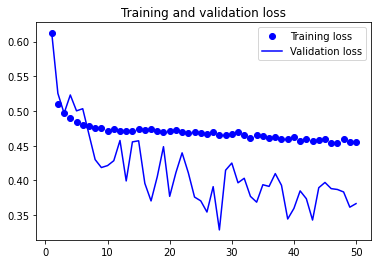

In [44]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

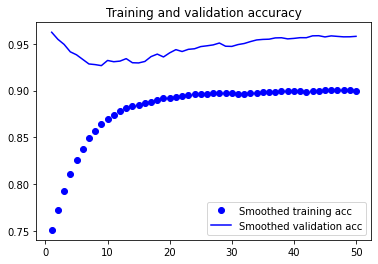

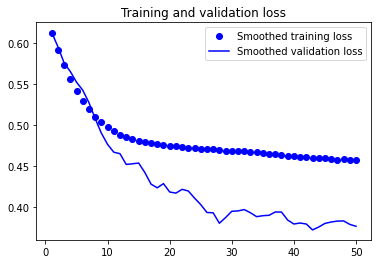

In [45]:
def smooth_curve(points, factor=0.8): 
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else: 
            smoothed_points.append(point)
    return smoothed_points
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [46]:
model_NA.evaluate(X_test_NA, Y_test_NA)

1281/1281 [==============================] - 4s 3ms/step - loss: 0.3645 - binary_accuracy: 0.9608


[0.3645079433917999, 0.9608484506607056]

Total accuracy: 96.0848446386292 %
[[38560   835]
 [  769   805]]


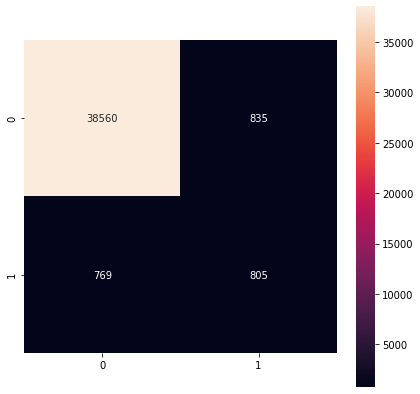

In [47]:
predicted_NA = np.array([int(x[0] > 0.5) for x in model_NA.predict(X_test_NA)])
print("Total accuracy:", np.sum(predicted_NA==Y_test_NA) / len(predicted_NA) * 100., "%") 
matrix = confusion_matrix(Y_test_NA, predicted_NA)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Neural Network V2

### df1_ok

In [50]:
neg, pos = np.bincount(df1_ok['B8.1'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 176283
    Positive: 6197 (3.52% of total)



In [51]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.52
Weight for class 1: 14.22


In [52]:
def baseline_model2():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
  # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
    return model

In [53]:
model2 = baseline_model2()

history = model2.fit(
  X_train, Y_train, batch_size = 512,
  epochs=50, validation_split = 0.1,
  class_weight=class_weight)

Epoch 1/50
248/248 [==============================] - 3s 6ms/step - loss: 0.7548 - binary_accuracy: 0.6162 - val_loss: 0.4152 - val_binary_accuracy: 0.9248
Epoch 2/50
248/248 [==============================] - 1s 5ms/step - loss: 0.5366 - binary_accuracy: 0.8075 - val_loss: 0.4162 - val_binary_accuracy: 0.8846
Epoch 3/50
248/248 [==============================] - 1s 5ms/step - loss: 0.4900 - binary_accuracy: 0.8560 - val_loss: 0.4410 - val_binary_accuracy: 0.8687
Epoch 4/50
248/248 [==============================] - 1s 4ms/step - loss: 0.4759 - binary_accuracy: 0.8614 - val_loss: 0.4315 - val_binary_accuracy: 0.8695
Epoch 5/50
248/248 [==============================] - 1s 5ms/step - loss: 0.4776 - binary_accuracy: 0.8699 - val_loss: 0.4372 - val_binary_accuracy: 0.8657
Epoch 6/50
248/248 [==============================] - 1s 4ms/step - loss: 0.4668 - binary_accuracy: 0.8680 - val_loss: 0.4158 - val_binary_accuracy: 0.8795
Epoch 7/50
248/248 [==============================] - 1s 5ms/ste

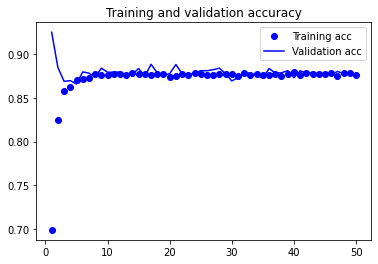

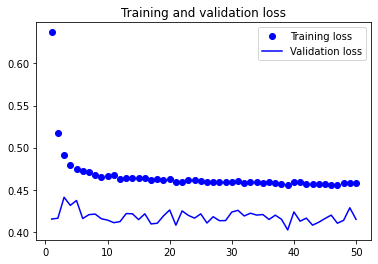

In [54]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

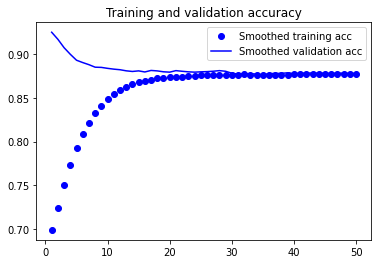

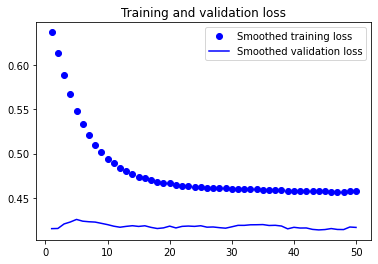

In [55]:
def smooth_curve(points, factor=0.8): 
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else: 
            smoothed_points.append(point)
    return smoothed_points
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [56]:
model2.evaluate(X_test, Y_test)

1102/1102 [==============================] - 3s 2ms/step - loss: 0.4130 - binary_accuracy: 0.8782


[0.41301050782203674, 0.878180205821991]

Total accuracy: 87.81802195308734 %
[[30120  3944]
 [  351   842]]


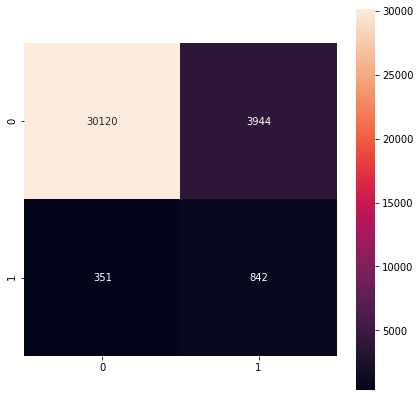

In [57]:
predicted = np.array([int(x[0] > 0.5) for x in model2.predict(X_test)])
print("Total accuracy:", np.sum(predicted==Y_test) / len(predicted) * 100., "%") 
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### df_ok_NA

In [58]:
neg, pos = np.bincount(df_ok_NA['B8.1'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 204843
    Positive: 7740 (3.78% of total)



In [59]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.52
Weight for class 1: 13.23


In [60]:
def baseline_model2_NA():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_NA.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
    return model

In [61]:
model2_NA = baseline_model2_NA()

history = model2_NA.fit(
  X_train_NA, Y_train_NA, batch_size = 512,
  epochs=50, validation_split = 0.1,
  class_weight=class_weight)

Epoch 1/50
289/289 [==============================] - 3s 6ms/step - loss: 0.6923 - binary_accuracy: 0.6724 - val_loss: 0.3242 - val_binary_accuracy: 0.9307
Epoch 2/50
289/289 [==============================] - 1s 5ms/step - loss: 0.4955 - binary_accuracy: 0.8410 - val_loss: 0.3958 - val_binary_accuracy: 0.8877
Epoch 3/50
289/289 [==============================] - 1s 4ms/step - loss: 0.4709 - binary_accuracy: 0.8678 - val_loss: 0.4305 - val_binary_accuracy: 0.8780
Epoch 4/50
289/289 [==============================] - 1s 5ms/step - loss: 0.4656 - binary_accuracy: 0.8727 - val_loss: 0.4239 - val_binary_accuracy: 0.8784
Epoch 5/50
289/289 [==============================] - 1s 5ms/step - loss: 0.4688 - binary_accuracy: 0.8743 - val_loss: 0.4074 - val_binary_accuracy: 0.8896
Epoch 6/50
289/289 [==============================] - 1s 4ms/step - loss: 0.4680 - binary_accuracy: 0.8770 - val_loss: 0.4297 - val_binary_accuracy: 0.8744
Epoch 7/50
289/289 [==============================] - 1s 5ms/ste

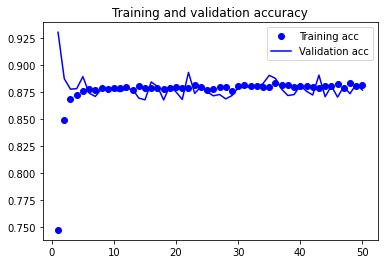

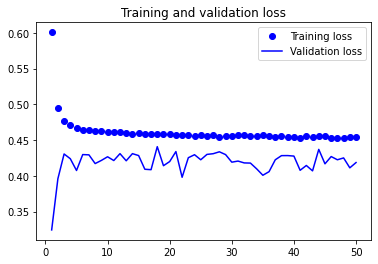

In [62]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

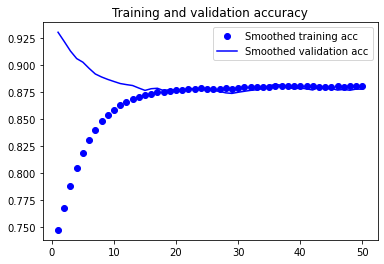

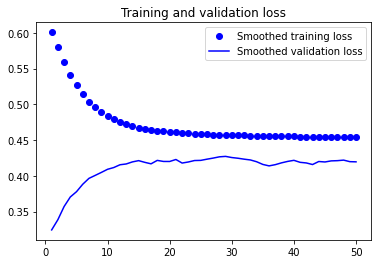

In [63]:
def smooth_curve(points, factor=0.8): 
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else: 
            smoothed_points.append(point)
    return smoothed_points
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [64]:
model2_NA.evaluate(X_test_NA, Y_test_NA)

1281/1281 [==============================] - 3s 2ms/step - loss: 0.4102 - binary_accuracy: 0.8804


[0.41016000509262085, 0.8804217576980591]

Total accuracy: 88.042178232322 %
[[35013  4382]
 [  517  1057]]


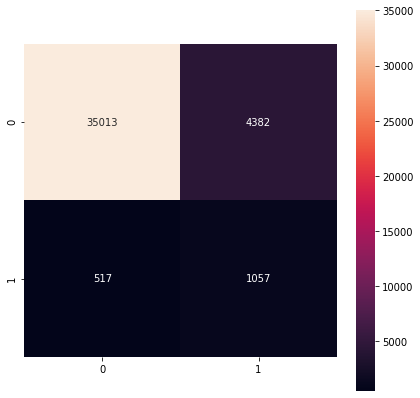

In [65]:
predicted_NA = np.array([int(x[0] > 0.5) for x in model2_NA.predict(X_test_NA)])
print("Total accuracy:", np.sum(predicted_NA==Y_test_NA) / len(predicted_NA) * 100., "%") 
matrix = confusion_matrix(Y_test_NA, predicted_NA)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Cli & Cli_who

### Cli

In [200]:
X_NA = df_NA_DE['Cli']
Y_NA = df_NA_DE['B8.1']

X = df_no_na_DE['Cli']
Y = df_no_na_DE['B8.1']


X=X.values.reshape(-1,1)
X_NA=X_NA.values.reshape(-1,1)

In [201]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)


X_train_NA, X_test_NA, Y_train_NA, Y_test_NA = train_test_split(X_NA, Y_NA, test_size = 0.2, random_state=2)

Accuracy Score: 0.9484859848129746
Area Under Curve: 0.5747374521194645
Recall score: 0.15714285714285714

Specificity: 0.992332047096072
F1 score: 0.24259131633356307
Precision score: 0.5317220543806647
[[20059   155]
 [  944   176]]

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     20214
           1       0.53      0.16      0.24      1120

    accuracy                           0.95     21334
   macro avg       0.74      0.57      0.61     21334
weighted avg       0.93      0.95      0.93     21334



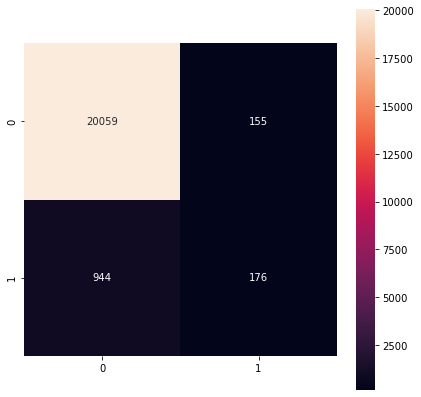

In [202]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,X_test)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, X_test)}')
print(f'Recall score: {recall_score(Y_test,X_test)}')
print("")
matrix = confusion_matrix(Y_test, X_test)
tn, fp, fn, tp = confusion_matrix(Y_test, X_test).ravel()
print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,X_test)}')
print(f'Precision score: {precision_score(Y_test,X_test)}')
print(matrix)
print("")
print(classification_report(Y_test, X_test))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

Accuracy Score: 0.9490456228887714
Area Under Curve: 0.5745378989802549
Recall score: 0.1558641975308642

Specificity: 0.9932116004296455
F1 score: 0.2439613526570048
Precision score: 0.5611111111111111
[[23117   158]
 [ 1094   202]]

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     23275
           1       0.56      0.16      0.24      1296

    accuracy                           0.95     24571
   macro avg       0.76      0.57      0.61     24571
weighted avg       0.93      0.95      0.94     24571



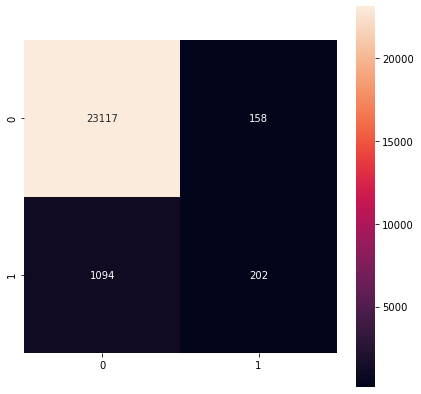

In [204]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_NA,X_test_NA)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_NA, X_test_NA)}')
print(f'Recall score: {recall_score(Y_test_NA,X_test_NA)}')
print("")
matrix = confusion_matrix(Y_test_NA, X_test_NA)
tn, fp, fn, tp = confusion_matrix(Y_test_NA, X_test_NA).ravel()
print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_NA,X_test_NA)}')
print(f'Precision score: {precision_score(Y_test_NA,X_test_NA)}')
print(matrix)
print("")
print(classification_report(Y_test_NA, X_test_NA))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### Cli_who

In [205]:
X_NA = df_NA_DE['Cli_who']
Y_NA = df_NA_DE['B8.1']

X = df_no_na_DE['Cli_who']
Y = df_no_na_DE['B8.1']


X=X.values.reshape(-1,1)
X_NA=X_NA.values.reshape(-1,1)

In [206]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)


X_train_NA, X_test_NA, Y_train_NA, Y_test_NA = train_test_split(X_NA, Y_NA, test_size = 0.2, random_state=2)

Accuracy Score: 0.9496578231930252
Area Under Curve: 0.5673436638680406
Recall score: 0.14017857142857143

Specificity: 0.9945087563075097
F1 score: 0.22622478386167147
Precision score: 0.585820895522388
[[20103   111]
 [  963   157]]

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     20214
           1       0.59      0.14      0.23      1120

    accuracy                           0.95     21334
   macro avg       0.77      0.57      0.60     21334
weighted avg       0.93      0.95      0.93     21334



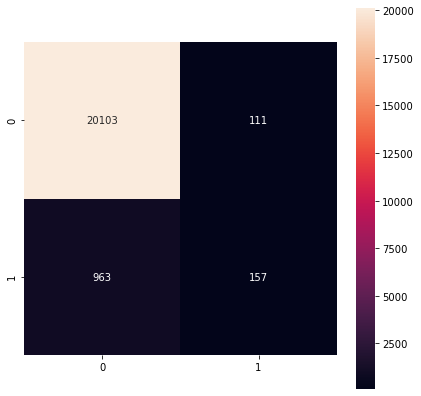

In [207]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,X_test)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, X_test)}')
print(f'Recall score: {recall_score(Y_test,X_test)}')
print("")
matrix = confusion_matrix(Y_test, X_test)
tn, fp, fn, tp = confusion_matrix(Y_test, X_test).ravel()
print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,X_test)}')
print(f'Precision score: {precision_score(Y_test,X_test)}')
print(matrix)
print("")
print(classification_report(Y_test, X_test))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

Accuracy Score: 0.9496560986528835
Area Under Curve: 0.5664807687207437
Recall score: 0.1381172839506173

Specificity: 0.99484425349087
F1 score: 0.2244514106583072
Precision score: 0.5986622073578596
[[23155   120]
 [ 1117   179]]

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     23275
           1       0.60      0.14      0.22      1296

    accuracy                           0.95     24571
   macro avg       0.78      0.57      0.60     24571
weighted avg       0.94      0.95      0.93     24571



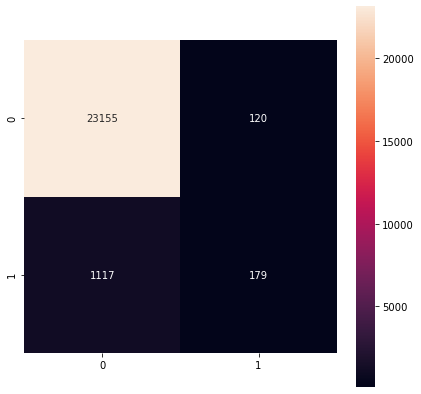

In [208]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_NA,X_test_NA)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_NA, X_test_NA)}')
print(f'Recall score: {recall_score(Y_test_NA,X_test_NA)}')
print("")
matrix = confusion_matrix(Y_test_NA, X_test_NA)
tn, fp, fn, tp = confusion_matrix(Y_test_NA, X_test_NA).ravel()
print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_NA,X_test_NA)}')
print(f'Precision score: {precision_score(Y_test_NA,X_test_NA)}')
print(matrix)
print("")
print(classification_report(Y_test_NA, X_test_NA))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Logistic Regression

#### No weights

In [87]:
df_DE = pd.read_csv('DE_Filter.csv')

df_DE.shape

(122854, 152)

In [88]:
# dataframe filter
df_filter_DE = df_DE

In [89]:
# Delete NA
col_names = ['B1_1.NA','B1_2.NA','B1_3.NA','B1_4.NA','B1_5.NA','B1_6.NA','B1_7.NA','B1_8.NA','B1_9.NA','B1_10.NA','B1_11.NA','B1_12.NA','E3.NA','E4.NA','E2.NA']

for i in range(len(col_names)):
    df_filter_na_DE = df_filter_DE.drop(df_filter_DE[df_filter_DE[col_names[i]]==1].index)
    df_filter_DE= df_filter_na_DE

df_filter_na_DE = df_filter_DE

In [90]:
df_filter_na_DE.shape

(106669, 152)

In [91]:
# dataframe without NA
df_no_na_DE = df_filter_na_DE

In [92]:
# dataframe with NA

df_NA_DE = pd.read_csv("DE_Filter.csv")
#df_NA_DE = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DE_Filter.csv')

In [93]:
df_no_na_DE.shape

(106669, 152)

In [94]:
df_NA_DE.shape

(122854, 152)

In [95]:
df1_ok_DE = df_no_na_DE[['B1_1.1','B1_2.1','B1_3.1','B1_4.1','B1_5.1','B1_6.1','B1_7.1','B1_8.1','B1_9.1','B1_10.1','B1_11.1','B1_12.1','B8.1','E3.1','E3.2','E3.3','E3.4','E4.1','E4.2','E4.3','E4.4','E4.5','E4.6','E4.7','E2.1','E2.2','E2.3']]

df_ok_NA_DE = df_NA_DE[['B1_1.1','B1_1.2','B1_2.1','B1_2.2','B1_3.1','B1_3.2','B1_4.1','B1_4.2','B1_5.1','B1_5.2','B1_6.1','B1_6.2','B1_7.1','B1_7.2','B1_8.1','B1_8.2','B1_9.1','B1_9.2','B1_10.1','B1_10.2','B1_11.1','B1_11.2','B1_12.1','B1_12.2','B8.1','E3.1','E3.2','E3.3','E3.4','E4.1','E4.2','E4.3','E4.4','E4.5','E4.6','E4.7','E2.1','E2.2','E2.3']]

In [96]:
df1_ok_DE.shape

(106669, 27)

In [97]:
df_ok_NA_DE.shape

(122854, 39)

In [98]:
X_DE = df1_ok_DE.drop(['B8.1'], axis=1)
Y_DE = df1_ok_DE['B8.1']

X_NA_DE = df_ok_NA_DE.drop(['B8.1'], axis=1)
Y_NA_DE = df_ok_NA_DE['B8.1']

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X_DE, Y_DE, test_size = 0.2, random_state=2)


X_train_NA, X_test_NA, Y_train_NA, Y_test_NA = train_test_split(X_NA_DE, Y_NA_DE, test_size = 0.2, random_state=2)

In [100]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print()
print(X_train_NA.shape)
print(X_test_NA.shape)
print(Y_train_NA.shape)
print(Y_test_NA.shape)

(85335, 26)
(21334, 26)
(85335,)
(21334,)

(98283, 38)
(24571, 38)
(98283,)
(24571,)


### df1_ok

In [157]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

Accuracy Score: 0.9598293803318646
Area Under Curve: 0.6882551785184243
Recall score: 0.3848214285714286

Specificity: 0.99168892846542
F1 score: 0.5014543339150669
Precision score: 0.7195325542570952
[[20046   168]
 [  689   431]]

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     20214
           1       0.72      0.38      0.50      1120

    accuracy                           0.96     21334
   macro avg       0.84      0.69      0.74     21334
weighted avg       0.95      0.96      0.95     21334



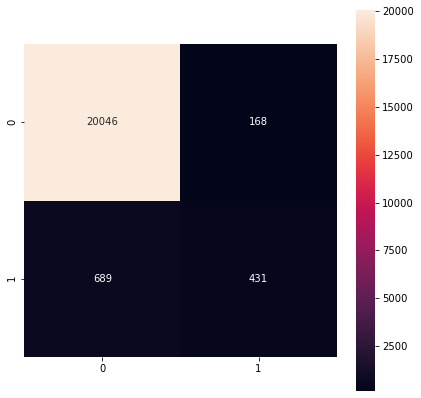

In [158]:
# define model
lg1 = LogisticRegression(random_state=2, class_weight=None)
# fit it
lg1.fit(X_train,Y_train)
# test
y_pred = lg1.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### df_ok_na

C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.9579585690448089
Area Under Curve: 0.6776089695137314
Recall score: 0.36419753086419754

Specificity: 0.999656283566058
F1 score: 0.05227781926811053
Precision score: 0.813953488372093
[[23066   209]
 [  824   472]]

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     23275
           1       0.69      0.36      0.48      1296

    accuracy                           0.96     24571
   macro avg       0.83      0.68      0.73     24571
weighted avg       0.95      0.96      0.95     24571



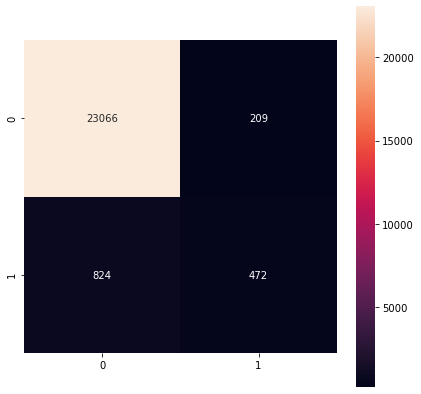

In [159]:
# define model
lg1_na = LogisticRegression(random_state=2, class_weight=None)
# fit it
lg1_na.fit(X_train_NA,Y_train_NA)
# test
y_pred_na = lg1_na.predict(X_test_NA)
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_NA,y_pred_na)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_NA, y_pred_na)}')
print(f'Recall score: {recall_score(Y_test_NA,y_pred_na)}')
print("")
matrix = confusion_matrix(Y_test_NA, y_pred_na)
tn, fp, fn, tp = confusion_matrix(Y_test_NA, y_pred_NA).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_NA,y_pred_NA)}')
print(f'Precision score: {precision_score(Y_test_NA,y_pred_NA)}')
print(matrix)
print("")
print(classification_report(Y_test_NA, y_pred_na))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

#### Weights

In [160]:
# https://towardsdatascience.com/weighted-logistic-regression-for-imbalanced-dataset-9a5cd88e68b

### df1_ok

In [161]:
# check the distribution
df1_ok_DE['B8.1'].value_counts()/df1_ok_DE.shape[0]

0    0.950885
1    0.049115
Name: B8.1, dtype: float64

In [162]:
# define class weights
w = {0:5, 1:95}
# define model
lg2 = LogisticRegression(random_state=2, class_weight=w)
# fit it
lg2.fit(X_train,Y_train)
# test
y_pred = lg2.predict(X_test)

Accuracy Score: 0.8773788319115028
Area Under Curve: 0.8130013321743064
Recall score: 0.7410714285714286

Specificity: 0.8849312357771841
F1 score: 0.38821328344246964
Precision score: 0.2629911280101394
[[17888  2326]
 [  290   830]]

              precision    recall  f1-score   support

           0       0.98      0.88      0.93     20214
           1       0.26      0.74      0.39      1120

    accuracy                           0.88     21334
   macro avg       0.62      0.81      0.66     21334
weighted avg       0.95      0.88      0.90     21334



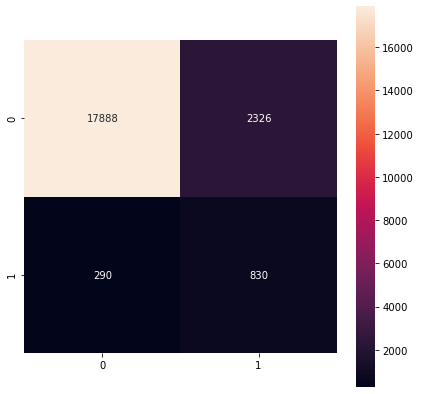

In [163]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### df_ok_na

In [164]:
# check the distribution
df_ok_NA_DE['B8.1'].value_counts()/df_ok_NA_DE.shape[0]

0    0.947336
1    0.052664
Name: B8.1, dtype: float64

In [165]:
# define class weights
w = {0:5, 1:95}
# define model
lg2_NA = LogisticRegression(random_state=2, class_weight=w)
# fit it
lg2_NA.fit(X_train_NA,Y_train_NA)
# test
y_pred_NA = lg2_NA.predict(X_test_NA)

C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.8672011721134671
Area Under Curve: 0.8096776663881926
Recall score: 0.7453703703703703

Specificity: 0.8739849624060151
F1 score: 0.37189605389797886
Precision score: 0.24775583482944344
[[20342  2933]
 [  330   966]]

              precision    recall  f1-score   support

           0       0.98      0.87      0.93     23275
           1       0.25      0.75      0.37      1296

    accuracy                           0.87     24571
   macro avg       0.62      0.81      0.65     24571
weighted avg       0.95      0.87      0.90     24571



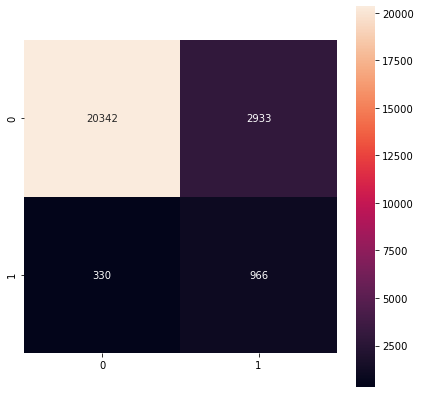

In [166]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_NA,y_pred_NA)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_NA, y_pred_NA)}')
print(f'Recall score: {recall_score(Y_test_NA,y_pred_NA)}')
print("")
matrix = confusion_matrix(Y_test_NA, y_pred_NA)
tn, fp, fn, tp = confusion_matrix(Y_test_NA, y_pred_NA).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_NA,y_pred_NA)}')
print(f'Precision score: {precision_score(Y_test_NA,y_pred_NA)}')
print(matrix)
print("")
print(classification_report(Y_test_NA, y_pred_NA))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Logistic Regression. GridSearch

### df1_ok

In [167]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
hyperparam_grid = {"class_weight": w }

### Max accuracy

In [168]:
# define model
lg3 = LogisticRegression(random_state=2)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="accuracy", cv=5, n_jobs=-1, refit=True,verbose=3)
grid.fit(X_train,Y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.9619030878303156 with param: {'class_weight': {0: 1.0, 1: 1.0}}


In [169]:
# define model
lg3 = LogisticRegression(random_state=2, class_weight={0: 1.0, 1: 1.0})
# fit it
lg3.fit(X_train,Y_train)
# test
y_pred = lg3.predict(X_test)

Accuracy Score: 0.9598293803318646
Area Under Curve: 0.6882551785184243
Recall score: 0.3848214285714286

Specificity: 0.99168892846542
F1 score: 0.5014543339150669
Precision score: 0.7195325542570952
[[20046   168]
 [  689   431]]

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     20214
           1       0.72      0.38      0.50      1120

    accuracy                           0.96     21334
   macro avg       0.84      0.69      0.74     21334
weighted avg       0.95      0.96      0.95     21334



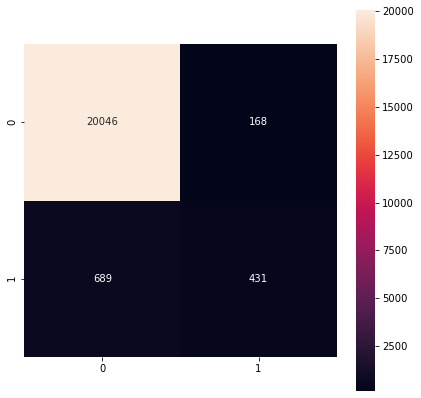

In [170]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### Max Roc_auc

In [171]:
# define model
lg3 = LogisticRegression(random_state=2)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="roc_auc", cv=5, n_jobs=-1, refit=True,verbose=3)
grid.fit(X_train,Y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.8750484178151341 with param: {'class_weight': {0: 1.0, 1: 10}}


In [172]:
# define model
lg3 = LogisticRegression(random_state=2, class_weight={0: 1.0, 1: 10})
# fit it
lg3.fit(X_train,Y_train)
# test
y_pred = lg3.predict(X_test)

Accuracy Score: 0.9339083153651448
Area Under Curve: 0.8048797509505435
Recall score: 0.6607142857142857

Specificity: 0.9490452161868013
F1 score: 0.5121107266435986
Precision score: 0.4180790960451977
[[19184  1030]
 [  380   740]]

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     20214
           1       0.42      0.66      0.51      1120

    accuracy                           0.93     21334
   macro avg       0.70      0.80      0.74     21334
weighted avg       0.95      0.93      0.94     21334



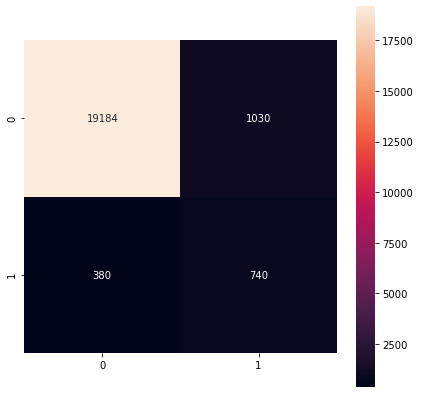

In [173]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### Max f1

In [174]:
# define model
lg3 = LogisticRegression(random_state=2)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="f1", cv=5, n_jobs=-1, refit=True,verbose=3)
grid.fit(X_train,Y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.4836967324454549 with param: {'class_weight': {0: 1.0, 1: 10}}


In [175]:
# define model
lg3 = LogisticRegression(random_state=2, class_weight={0: 1.0, 1: 10})
# fit it
lg3.fit(X_train,Y_train)
# test
y_pred = lg3.predict(X_test)

Accuracy Score: 0.9339083153651448
Area Under Curve: 0.8048797509505435
Recall score: 0.6607142857142857

Specificity: 0.9490452161868013
F1 score: 0.5121107266435986
Precision score: 0.4180790960451977
[[19184  1030]
 [  380   740]]

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     20214
           1       0.42      0.66      0.51      1120

    accuracy                           0.93     21334
   macro avg       0.70      0.80      0.74     21334
weighted avg       0.95      0.93      0.94     21334



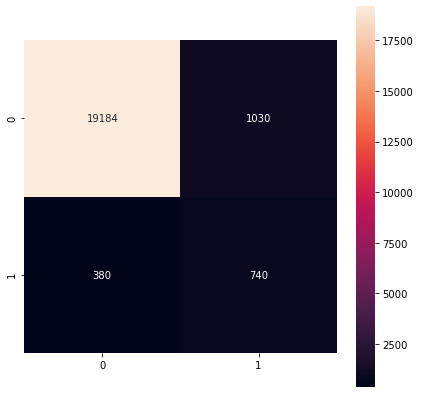

In [176]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### Max recall

In [177]:
# define model
lg3 = LogisticRegression(random_state=2)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="recall", cv=5, n_jobs=-1, refit=True,verbose=3)
grid.fit(X_train,Y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 1.0 with param: {'class_weight': {0: 0.01, 1: 10}}


In [178]:
# define model
lg3 = LogisticRegression(random_state=2, class_weight={0: 0.01, 1: 10})
# fit it
lg3.fit(X_train,Y_train)
# test
y_pred = lg3.predict(X_test)

Accuracy Score: 0.05249835942626793
Area Under Curve: 0.5
Recall score: 1.0

Specificity: 0.0
F1 score: 0.09975950832813753
Precision score: 0.05249835942626793
[[    0 20214]
 [    0  1120]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     20214
           1       0.05      1.00      0.10      1120

    accuracy                           0.05     21334
   macro avg       0.03      0.50      0.05     21334
weighted avg       0.00      0.05      0.01     21334



C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


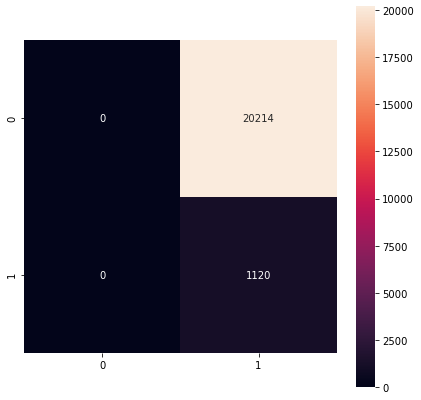

In [179]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### Max precision

In [180]:
# define model
lg3 = LogisticRegression(random_state=2)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="precision", cv=5, n_jobs=-1, refit=True,verbose=3)
grid.fit(X_train,Y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.8773103448275862 with param: {'class_weight': {0: 1.0, 1: 0.1}}


In [181]:
# define model
lg3 = LogisticRegression(random_state=2, class_weight={0: 1.0, 1: 0.1})
# fit it
lg3.fit(X_train,Y_train)
# test
y_pred = lg3.predict(X_test)

Accuracy Score: 0.9490953407706009
Area Under Curve: 0.5168653443864931
Recall score: 0.033928571428571426

Specificity: 0.9998021173444147
F1 score: 0.06540447504302925
Precision score: 0.9047619047619048
[[20210     4]
 [ 1082    38]]

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     20214
           1       0.90      0.03      0.07      1120

    accuracy                           0.95     21334
   macro avg       0.93      0.52      0.52     21334
weighted avg       0.95      0.95      0.93     21334



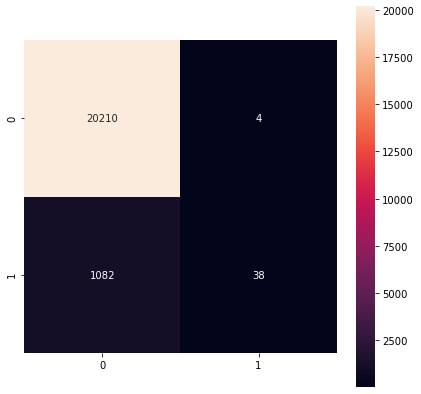

In [182]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### df_ok_na

In [183]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
hyperparam_grid = {"class_weight": w }

### Max acc

In [184]:
# define model
lg3_NA = LogisticRegression(random_state=2)
# define evaluation procedure
grid_NA = GridSearchCV(lg3_NA,hyperparam_grid,scoring="accuracy", cv=5, n_jobs=-1, refit=True,verbose=3)
grid_NA.fit(X_train_NA,Y_train_NA)
print(f'Best score: {grid_NA.best_score_} with param: {grid_NA.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.9590163002865857 with param: {'class_weight': {0: 1.0, 1: 1.0}}


C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [185]:
# define model
lg3_NA = LogisticRegression(random_state=2, class_weight={0: 1.0, 1: 1.0})
# fit it
lg3_NA.fit(X_train_NA,Y_train_NA)
# test
y_pred_NA = lg3_NA.predict(X_test_NA)

C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.9579585690448089
Area Under Curve: 0.6776089695137314
Recall score: 0.36419753086419754

Specificity: 0.9910204081632653
F1 score: 0.47749114820435007
Precision score: 0.6930983847283406
[[23066   209]
 [  824   472]]

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     23275
           1       0.69      0.36      0.48      1296

    accuracy                           0.96     24571
   macro avg       0.83      0.68      0.73     24571
weighted avg       0.95      0.96      0.95     24571



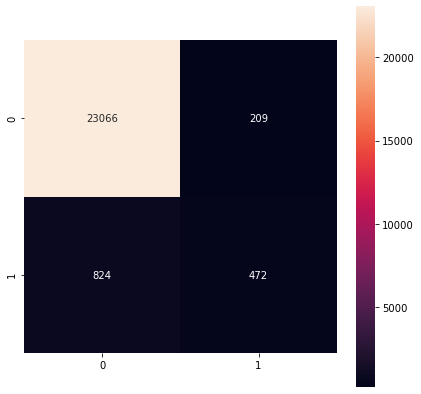

In [186]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_NA,y_pred_NA)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_NA, y_pred_NA)}')
print(f'Recall score: {recall_score(Y_test_NA,y_pred_NA)}')
print("")
matrix = confusion_matrix(Y_test_NA, y_pred_NA)
tn, fp, fn, tp = confusion_matrix(Y_test_NA, y_pred_NA).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_NA,y_pred_NA)}')
print(f'Precision score: {precision_score(Y_test_NA,y_pred_NA)}')
print(matrix)
print("")
print(classification_report(Y_test_NA, y_pred_NA))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### Max roc_auc

In [187]:
# define model
lg3_NA = LogisticRegression(random_state=2)
# define evaluation procedure
grid_NA = GridSearchCV(lg3_NA,hyperparam_grid,scoring="roc_auc", cv=5, n_jobs=-1, refit=True,verbose=3)
grid_NA.fit(X_train_NA,Y_train_NA)
print(f'Best score: {grid_NA.best_score_} with param: {grid_NA.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.8772515396022482 with param: {'class_weight': {0: 0.01, 1: 1.0}}


In [188]:
# define model
lg3_NA = LogisticRegression(random_state=2, class_weight={0: 0.01, 1: 1.0})
# fit it
lg3_NA.fit(X_train_NA,Y_train_NA)
# test
y_pred_NA = lg3_NA.predict(X_test_NA)

Accuracy Score: 0.2991331244149607
Area Under Curve: 0.6096517749399954
Recall score: 0.9567901234567902

Specificity: 0.26251342642320086
F1 score: 0.12588193492716107
Precision score: 0.06737299646835099
[[ 6110 17165]
 [   56  1240]]

              precision    recall  f1-score   support

           0       0.99      0.26      0.42     23275
           1       0.07      0.96      0.13      1296

    accuracy                           0.30     24571
   macro avg       0.53      0.61      0.27     24571
weighted avg       0.94      0.30      0.40     24571



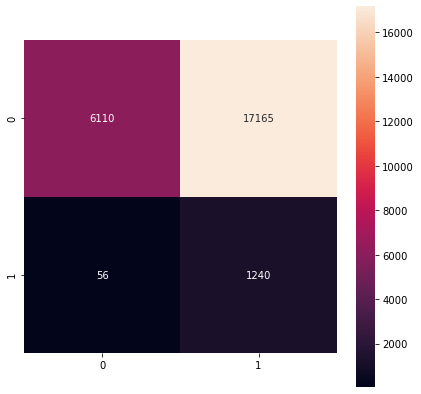

In [189]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_NA,y_pred_NA)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_NA, y_pred_NA)}')
print(f'Recall score: {recall_score(Y_test_NA,y_pred_NA)}')
print("")
matrix = confusion_matrix(Y_test_NA, y_pred_NA)
tn, fp, fn, tp = confusion_matrix(Y_test_NA, y_pred_NA).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_NA,y_pred_NA)}')
print(f'Precision score: {precision_score(Y_test_NA,y_pred_NA)}')
print(matrix)
print("")
print(classification_report(Y_test_NA, y_pred_NA))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### Max f1

In [190]:
# define model
lg3_NA = LogisticRegression(random_state=2)
# define evaluation procedure
grid_NA = GridSearchCV(lg3_NA,hyperparam_grid,scoring="f1", cv=5, n_jobs=-1, refit=True,verbose=3)
grid_NA.fit(X_train_NA,Y_train_NA)
print(f'Best score: {grid_NA.best_score_} with param: {grid_NA.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.4897095274955606 with param: {'class_weight': {0: 1.0, 1: 1.0}}


C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [191]:
# define model
lg3_NA = LogisticRegression(random_state=2, class_weight={0: 1.0, 1: 1.0})
# fit it
lg3_NA.fit(X_train_NA,Y_train_NA)
# test
y_pred_NA = lg3_NA.predict(X_test_NA)

C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.9579585690448089
Area Under Curve: 0.6776089695137314
Recall score: 0.36419753086419754

Specificity: 0.9910204081632653
F1 score: 0.47749114820435007
Precision score: 0.6930983847283406
[[23066   209]
 [  824   472]]

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     23275
           1       0.69      0.36      0.48      1296

    accuracy                           0.96     24571
   macro avg       0.83      0.68      0.73     24571
weighted avg       0.95      0.96      0.95     24571



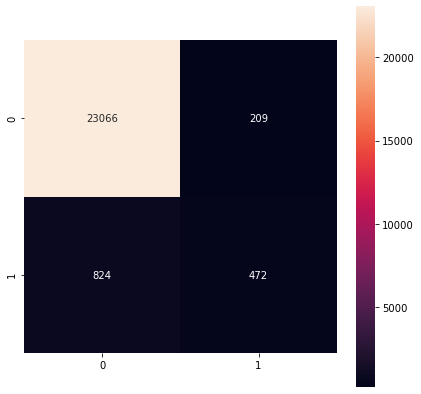

In [192]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_NA,y_pred_NA)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_NA, y_pred_NA)}')
print(f'Recall score: {recall_score(Y_test_NA,y_pred_NA)}')
print("")
matrix = confusion_matrix(Y_test_NA, y_pred_NA)
tn, fp, fn, tp = confusion_matrix(Y_test_NA, y_pred_NA).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_NA,y_pred_NA)}')
print(f'Precision score: {precision_score(Y_test_NA,y_pred_NA)}')
print(matrix)
print("")
print(classification_report(Y_test_NA, y_pred_NA))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### Max Recall

In [193]:
# define model
lg3_NA = LogisticRegression(random_state=2)
# define evaluation procedure
grid_NA = GridSearchCV(lg3_NA,hyperparam_grid,scoring="recall", cv=5, n_jobs=-1, refit=True,verbose=3)
grid_NA.fit(X_train_NA,Y_train_NA)
print(f'Best score: {grid_NA.best_score_} with param: {grid_NA.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 1.0 with param: {'class_weight': {0: 0.01, 1: 10}}


C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [194]:
# define model
lg3_NA = LogisticRegression(random_state=2, class_weight={0: 0.01, 1: 10})
# fit it
lg3_NA.fit(X_train_NA,Y_train_NA)
# test
y_pred_NA = lg3_NA.predict(X_test_NA)

C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.052745106019291034
Area Under Curve: 0.5
Recall score: 1.0

Specificity: 0.0
F1 score: 0.10020489426682647
Precision score: 0.052745106019291034
[[    0 23275]
 [    0  1296]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     23275
           1       0.05      1.00      0.10      1296

    accuracy                           0.05     24571
   macro avg       0.03      0.50      0.05     24571
weighted avg       0.00      0.05      0.01     24571



C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


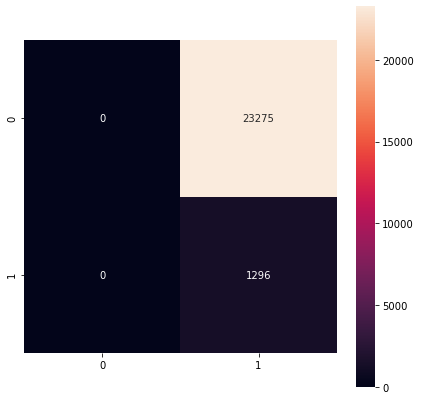

In [195]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_NA,y_pred_NA)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_NA, y_pred_NA)}')
print(f'Recall score: {recall_score(Y_test_NA,y_pred_NA)}')
print("")
matrix = confusion_matrix(Y_test_NA, y_pred_NA)
tn, fp, fn, tp = confusion_matrix(Y_test_NA, y_pred_NA).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_NA,y_pred_NA)}')
print(f'Precision score: {precision_score(Y_test_NA,y_pred_NA)}')
print(matrix)
print("")
print(classification_report(Y_test_NA, y_pred_NA))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### Max precision

In [196]:
# define model
lg3_NA = LogisticRegression(random_state=2)
# define evaluation procedure
grid_NA = GridSearchCV(lg3_NA,hyperparam_grid,scoring="precision", cv=5, n_jobs=-1, refit=True,verbose=3)
grid_NA.fit(X_train_NA,Y_train_NA)
print(f'Best score: {grid_NA.best_score_} with param: {grid_NA.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best score: 0.8760440495938688 with param: {'class_weight': {0: 10, 1: 1.0}}


C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [197]:
# define model
lg3_NA = LogisticRegression(random_state=2, class_weight={0: 10, 1: 1.0})
# fit it
lg3_NA.fit(X_train_NA,Y_train_NA)
# test
y_pred_NA = lg3_NA.predict(X_test_NA)

C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.9483537503561109
Area Under Curve: 0.513331228202782
Recall score: 0.02700617283950617

Specificity: 0.999656283566058
F1 score: 0.05227781926811053
Precision score: 0.813953488372093
[[23267     8]
 [ 1261    35]]

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     23275
           1       0.81      0.03      0.05      1296

    accuracy                           0.95     24571
   macro avg       0.88      0.51      0.51     24571
weighted avg       0.94      0.95      0.92     24571



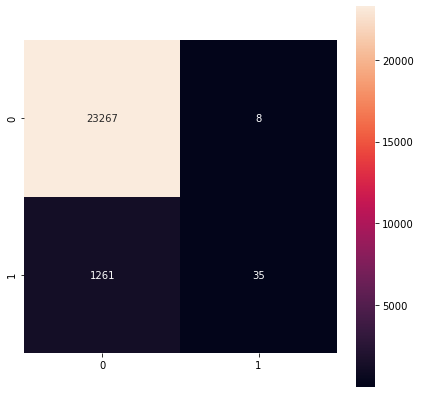

In [198]:
# performance
print(f'Accuracy Score: {accuracy_score(Y_test_NA,y_pred_NA)}')
print(f'Area Under Curve: {roc_auc_score(Y_test_NA, y_pred_NA)}')
print(f'Recall score: {recall_score(Y_test_NA,y_pred_NA)}')
print("")
matrix = confusion_matrix(Y_test_NA, y_pred_NA)
tn, fp, fn, tp = confusion_matrix(Y_test_NA, y_pred_NA).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test_NA,y_pred_NA)}')
print(f'Precision score: {precision_score(Y_test_NA,y_pred_NA)}')
print(matrix)
print("")
print(classification_report(Y_test_NA, y_pred_NA))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

In [84]:
# https://scikit-learn.org/stable/modules/model_evaluation.html